In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pickle

In [193]:
df=pd.read_csv('/content/first inten project.csv')
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [194]:
df.drop(['Booking_ID'],axis=1,inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [196]:
#duplicates = df.duplicated(keep='first')
#print("\nDuplicate Rows:")
#print(df[duplicates])

In [197]:
#df_cleaned = df.drop_duplicates()
#print("\nDataFrame after removing duplicates:")
#df_cleaned.info()

In [198]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


lead_time : Number of days between the date of booking and the arrival date .


Text(0.5, 1.0, 'Box plot of lead time')

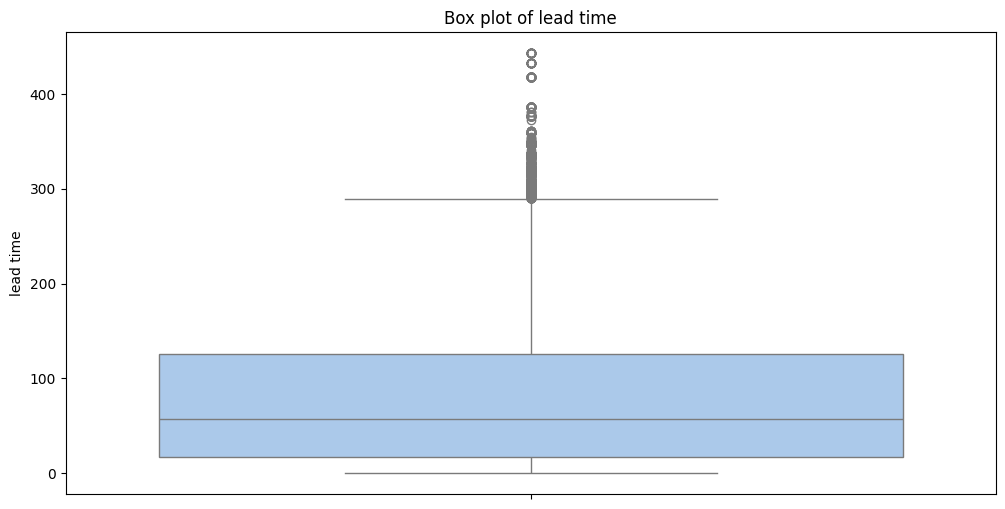

In [199]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['lead time'])
plt.title('Box plot of lead time')

Text(0.5, 1.0, 'Box plot of lead time after removing outliers')

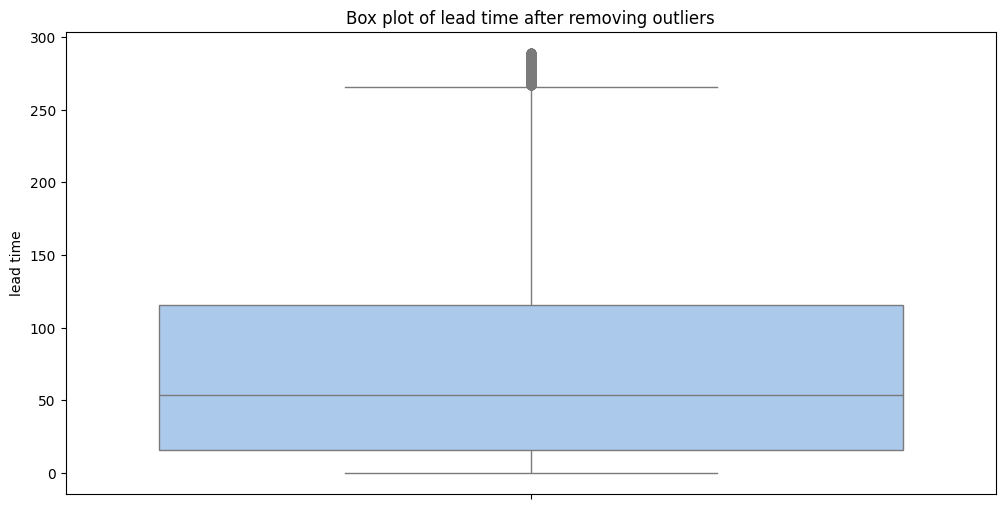

In [200]:
Q1 = df['lead time'].quantile(0.25)
Q3 = df['lead time'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['lead time'] < Q1 - 1.5 * IQR) | (df['lead time'] > Q3 + 1.5 * IQR)
df = df[~outliers]
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['lead time'])
plt.title('Box plot of lead time after removing outliers')

average price : Average price per day of the reservation; prices of the rooms are dynamic

Text(0.5, 1.0, 'Box plot of average price')

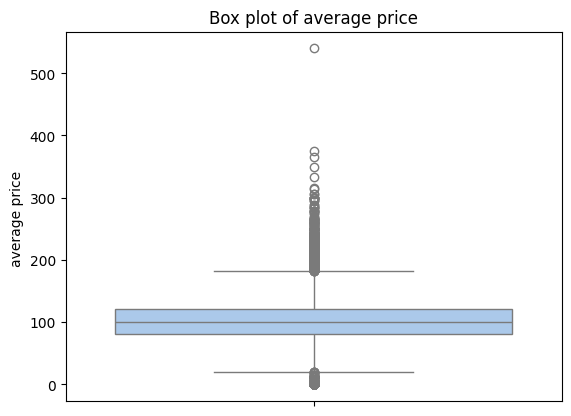

In [201]:
#plt.figure(figsize=(12, 6))
sns.boxplot(y=df['average price '])
plt.title('Box plot of average price')

Text(0.5, 1.0, 'Box plot of average price after removing outliers')

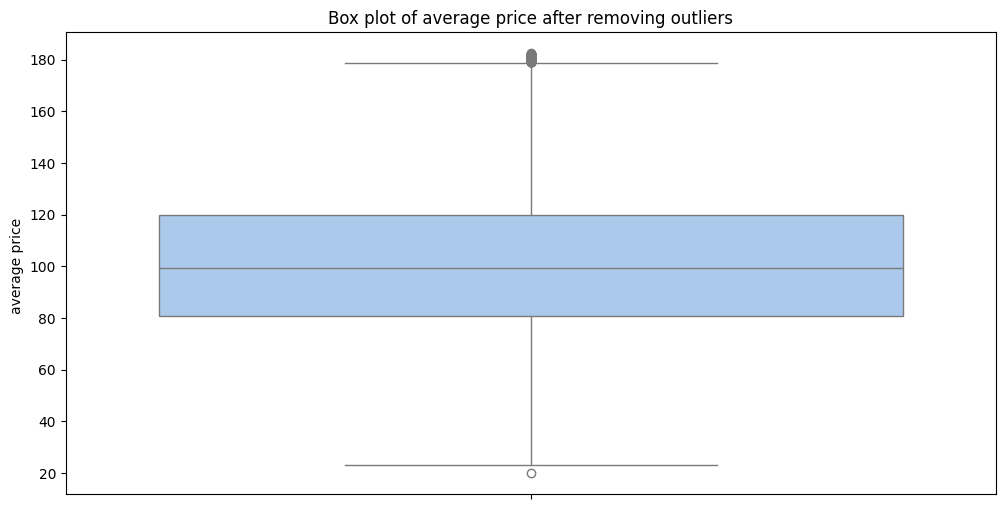

In [202]:
Q1 = df['average price '].quantile(0.25)
Q3 = df['average price '].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['average price '] < Q1 - 1.5 * IQR) | (df['average price '] > Q3 + 1.5 * IQR)
df = df[~outliers]
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['average price '])
plt.title('Box plot of average price after removing outliers')

Number of adults

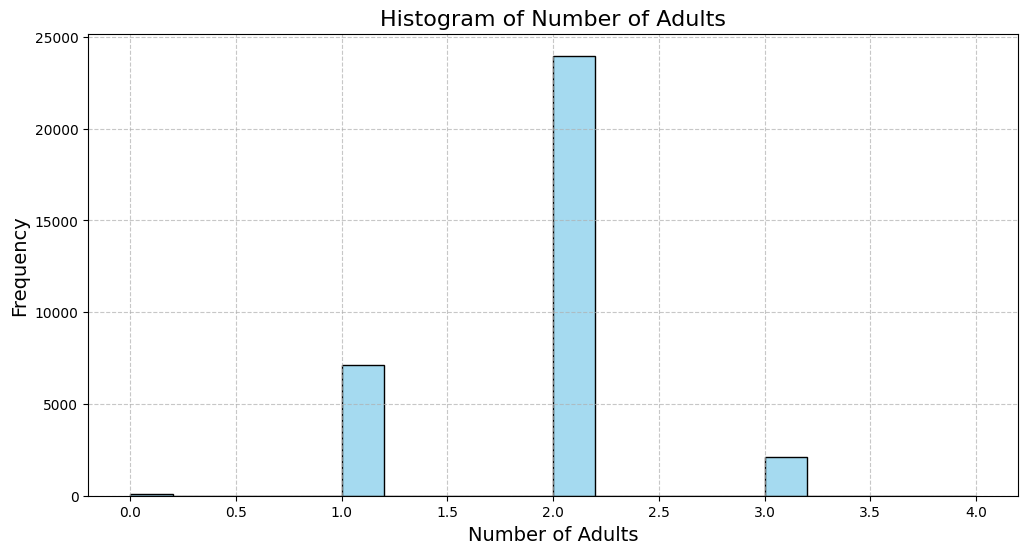

In [203]:
plt.figure(figsize=(12, 6))
sns.histplot(df['number of adults'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('Number of Adults', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Number of Adults', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Number of Childrens

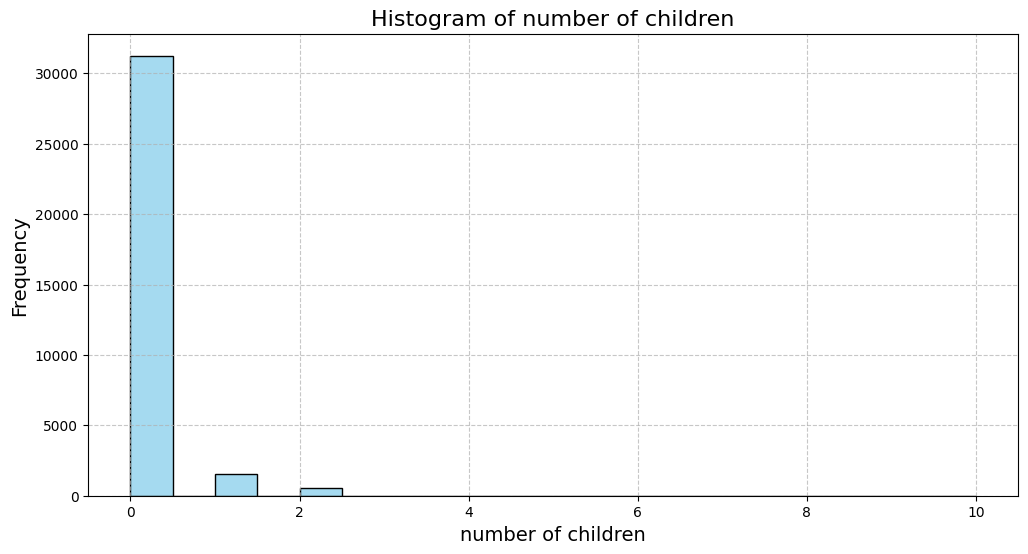

In [204]:
plt.figure(figsize=(12, 6))
sns.histplot(df['number of children'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('number of children', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of number of children', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel .


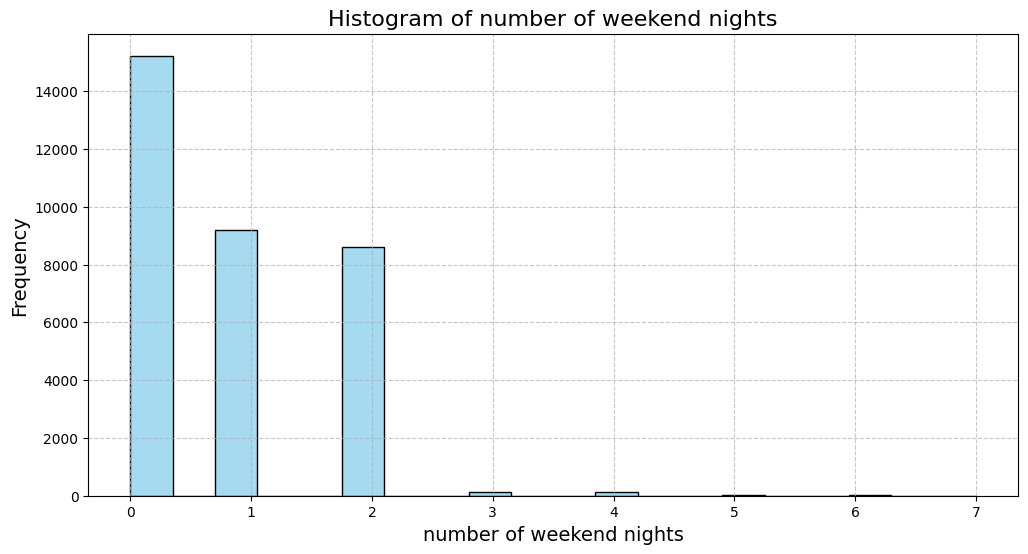

In [205]:
plt.figure(figsize=(12, 6))
sns.histplot(df['number of weekend nights'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('number of weekend nights', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of number of weekend nights', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

number of week nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

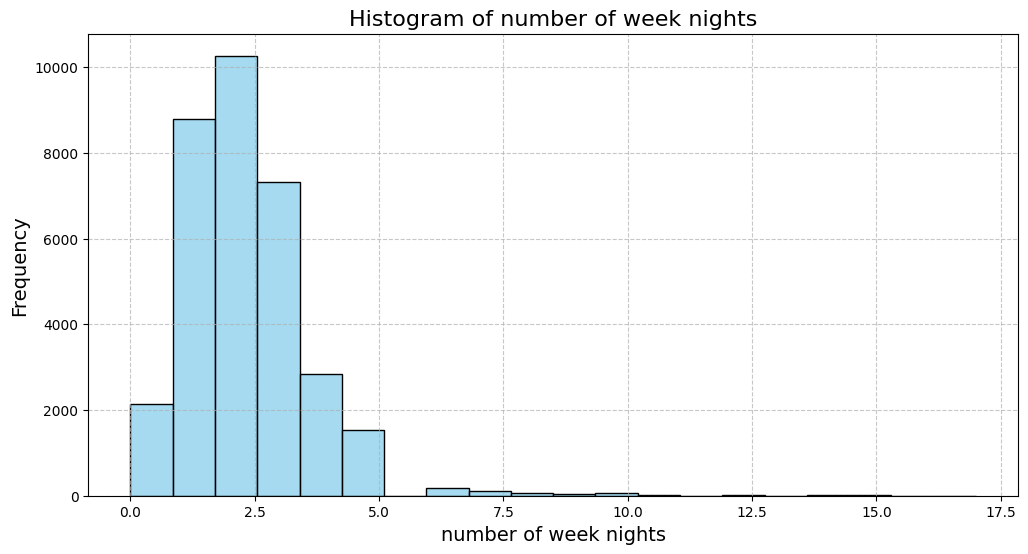

In [206]:
plt.figure(figsize=(12, 6))
sns.histplot(df['number of week nights'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('number of week nights', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of number of week nights', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

type of meal : Type of meal plan booked by the customer.


In [207]:
df=df.replace({'type of meal':{'Meal Plan 1':1,'Meal Plan 2':2,'Meal Plan 3':3,'Not Selected':0}})

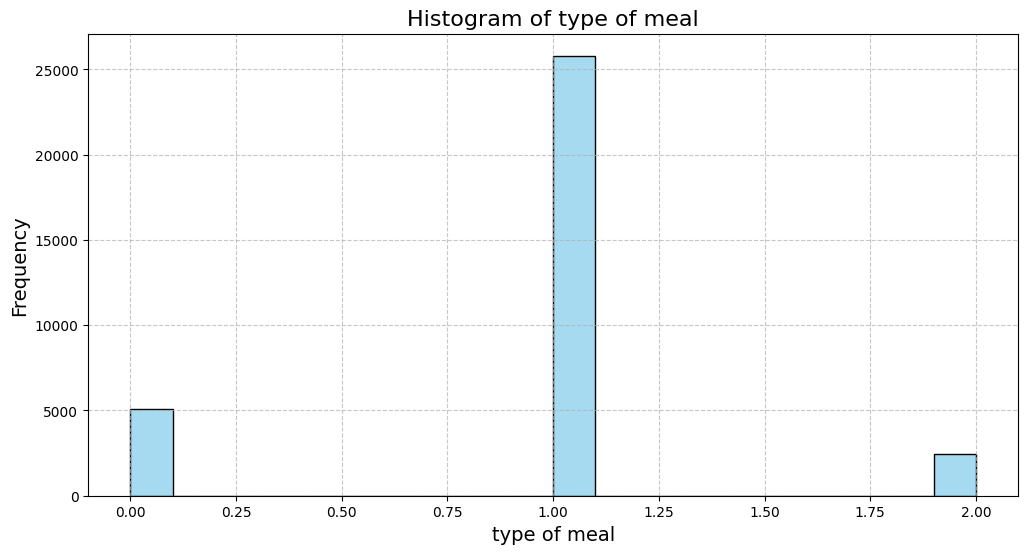

In [208]:
plt.figure(figsize=(12, 6))
sns.histplot(df['type of meal'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('type of meal', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of type of meal', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

car_parking_space : Does the customer require a car parking space? (0 - No, 1- Yes).


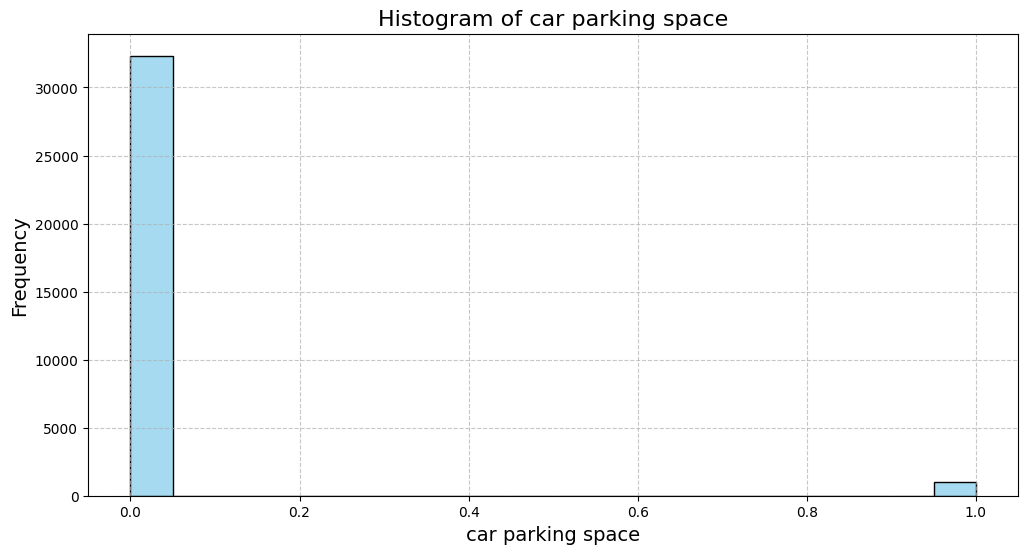

In [209]:
plt.figure(figsize=(12, 6))
sns.histplot(df['car parking space'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('car parking space', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of car parking space', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

room_type : Type of room reserved by the customer

In [210]:
df=df.replace({'room type':{'Room_Type 1':1,'Room_Type 2':2,'Room_Type 3':3,'Room_Type 4':4,'Room_Type 5':5,'Room_Type 6':6,'Room_Type 7':7}})

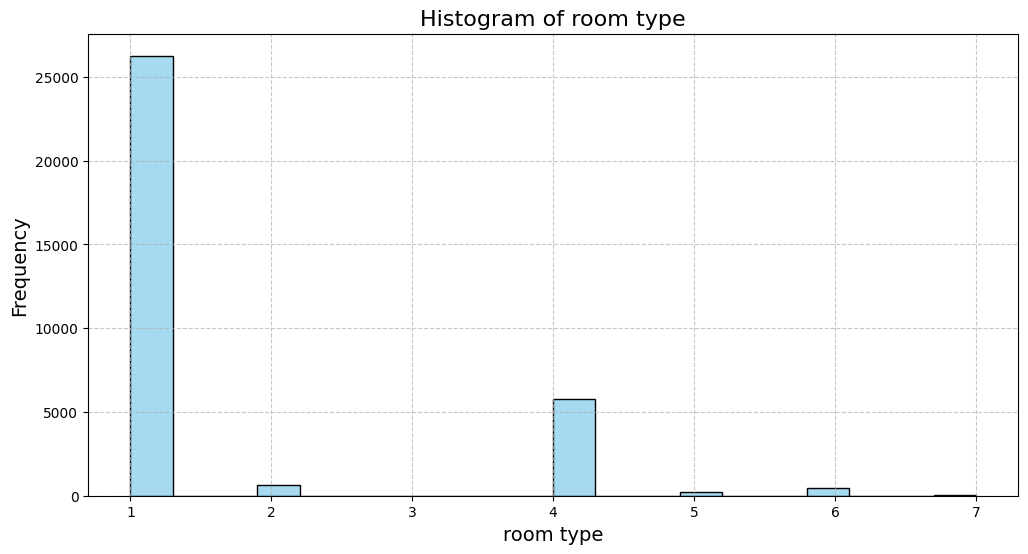

In [211]:
plt.figure(figsize=(12, 6))
sns.histplot(df['room type'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('room type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of room type', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

market segment type : Where the booking came from .


In [212]:
df=df.replace({'market segment type}':{'Online':1,'Offline':2,'Groups':3,'Direct':4,'Corporate':5,'Aviation':6,'Complementary':7}})

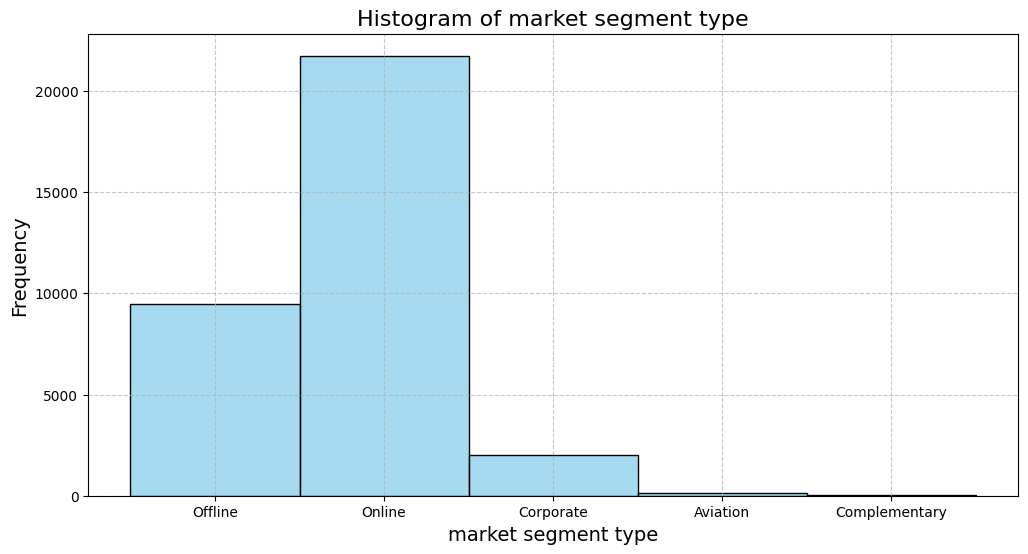

In [213]:
plt.figure(figsize=(12, 6))
sns.histplot(df['market segment type'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('market segment type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of market segment type', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

repeated : Is the customer a repeated guest? (0 - No, 1- Yes) .

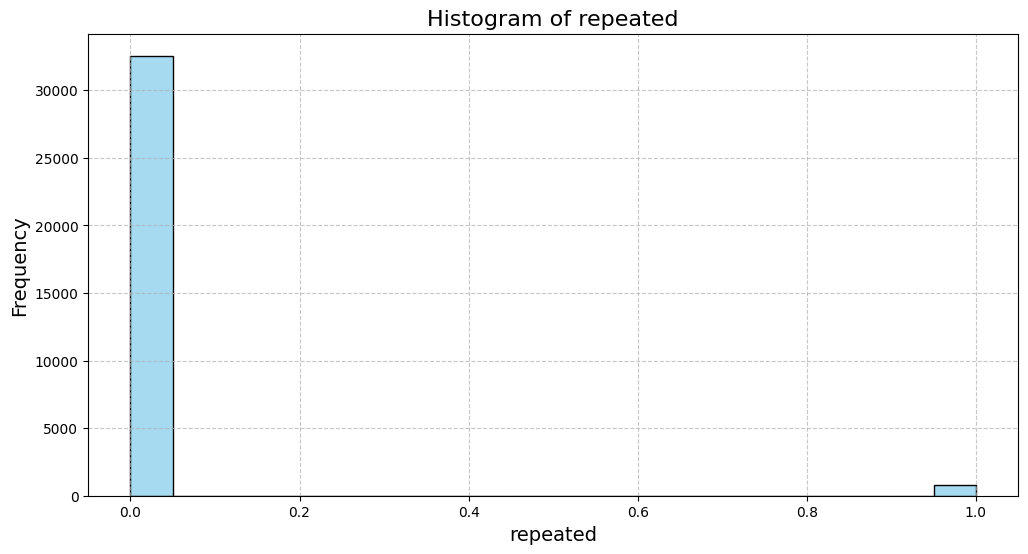

In [214]:
plt.figure(figsize=(12, 6))
sns.histplot(df['repeated'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('repeated', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of repeated', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

P-C : Number of previous bookings that were canceled by the customer prior to the current booking .

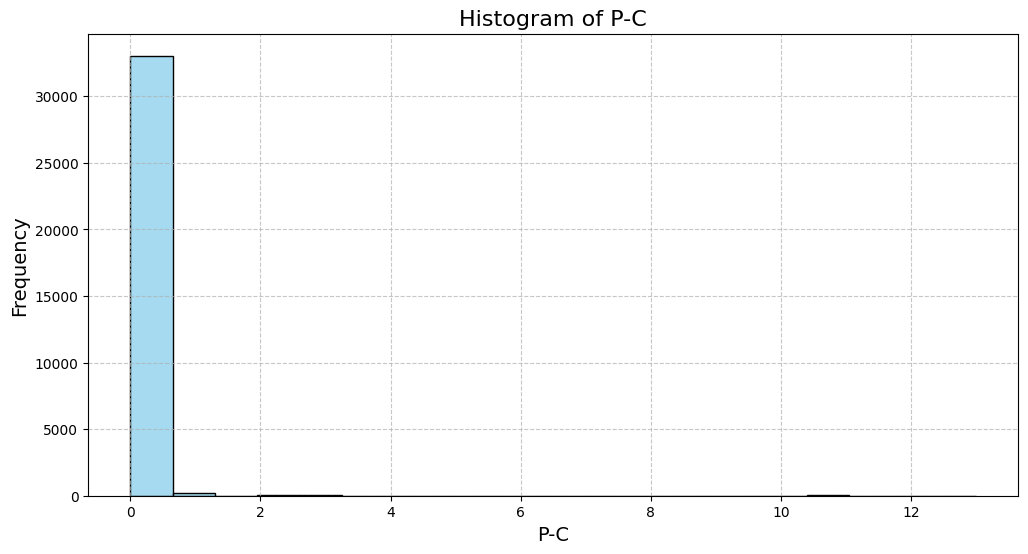

In [215]:
#P-C : Number of previous bookings that were canceled by the customer prior to the current booking .
plt.figure(figsize=(12, 6))
sns.histplot(df['P-C'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('P-C', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of P-C', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

P-not-C : Number of previous bookings not canceled by the customer prior to the current booking .

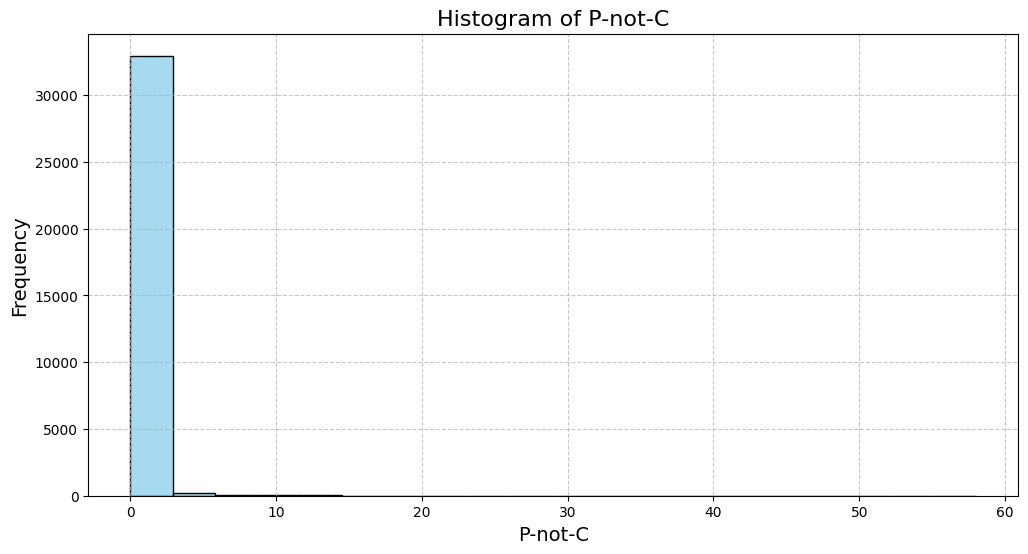

In [216]:
#P-not-C : Number of previous bookings not canceled by the customer prior to the current booking .
plt.figure(figsize=(12, 6))
sns.histplot(df['P-not-C'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('P-not-C', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of P-not-C', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

special requests : Total number of special requests made by the customer (e.g. high floor, view from the room, etc) .


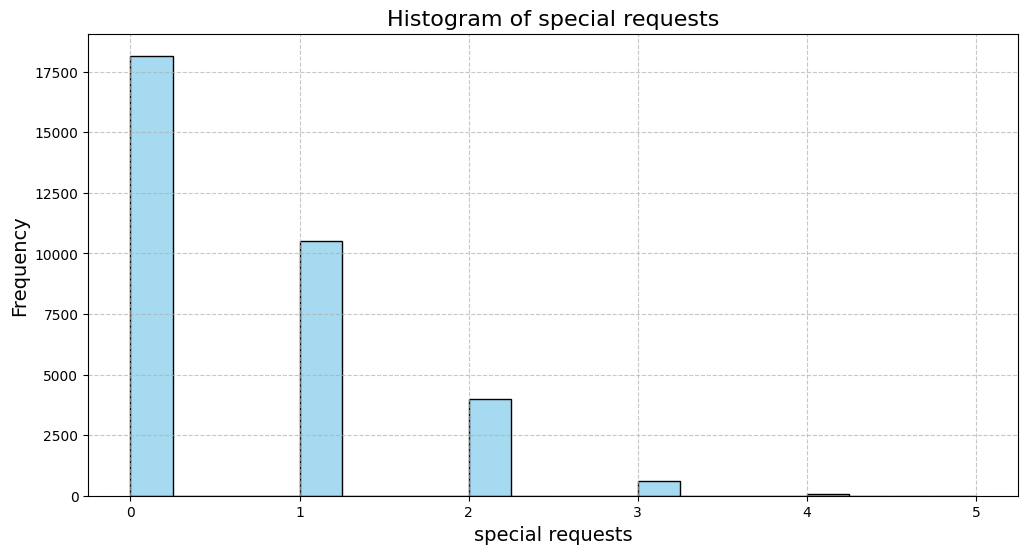

In [217]:
plt.figure(figsize=(12, 6))
sns.histplot(df['special requests'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('special requests', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of special requests', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

booking status : Flag indicating if the booking was canceled or not.

In [218]:
df=df.replace({'booking status':{'Canceled':0,'Not_Canceled':1}})

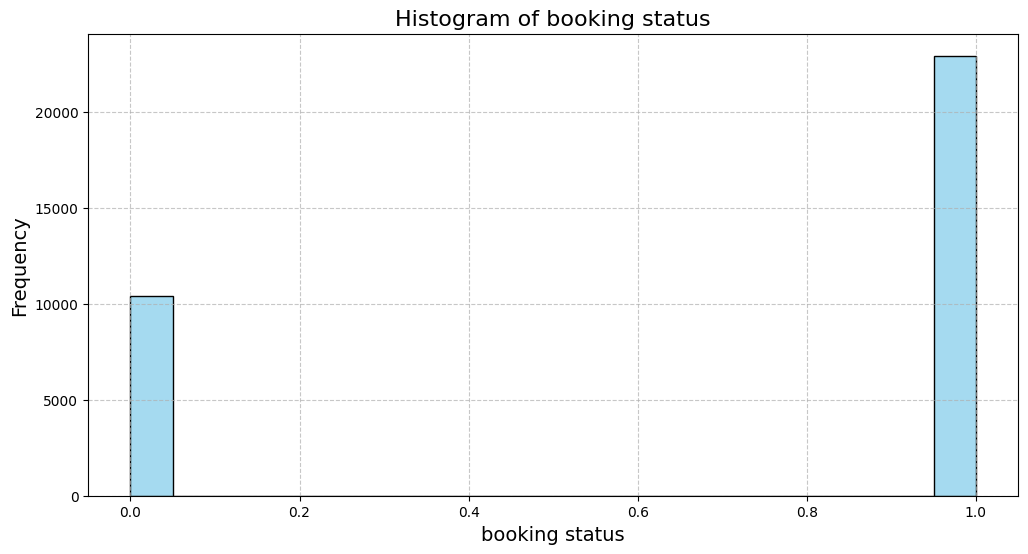

In [219]:
plt.figure(figsize=(12, 6))
sns.histplot(df['booking status'], bins=20,  color='skyblue', edgecolor='black')
plt.xlabel('booking status', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of booking status', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [220]:
df.drop(['date of reservation'],axis=1,inplace=True)

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [222]:
for col in df.columns:
    print(f'{col}')
    print(df[col].unique())
    print('='*75)

number of adults
[1 2 3 0 4]
number of children
[ 1  0  2  3 10  9]
number of weekend nights
[2 1 0 4 3 6 5 7]
number of week nights
[ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]
type of meal
[1 0 2]
car parking space
[0 1]
room type
[1 4 2 6 5 7 3]
lead time
[224   5   1 211  48  34  83 121  44   0  35  30  95  47 256  99  12 122
   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146  32
  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74 143
 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134 118
 189  16  24   8  10 182 123 105 286 148  14  85  25  28  80  11 162  82
  27 245 266 112  88  69 273   4  97  31  62 197 280 185 160 104  22 109
 126  81  54  15 161 147  87 127 156  58 111 195 119  59  78 103  70  76
 144  49  77  36  79  21  33 164 152  43 102  71 209  93  53 239  45 167
 113 166 174  61 151  52  84  67 282  38 175  89 133  65  66  50 159 115
 237 125  91  29 221 213 198  75 180 236 120 230  63 136 157 268 217  94


In [223]:
hot=['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'special requests']
df=pd.get_dummies(columns=hot,data=df)

In [224]:
X=df.drop('booking status',axis=1)
Y=df['booking status']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [227]:
y_pred = model.predict(X_test)

In [228]:
print(accuracy_score(y_test, y_pred))

0.875543559754086


In [229]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2085
           1       0.90      0.93      0.91      4584

    accuracy                           0.88      6669
   macro avg       0.86      0.85      0.85      6669
weighted avg       0.87      0.88      0.87      6669



Cross-validation scores are crucial for:

-Estimating Model Performance: Provides a reliable measure of how well a model generalizes.

-Model Comparison: Helps in selecting the best model and tuning hyperparameters.

-Robustness: Reduces variance and provides confidence intervals.

-Bias-Variance Tradeoff: Aids in diagnosing model fit issues.

In [230]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,X,Y,cv=5)
print(cv_score)
print(f'cross validation score : {np.mean(cv_score)*100}')

[0.86954566 0.87209477 0.87014545 0.8762933  0.86579697]
cross validation score : 87.07752286699655


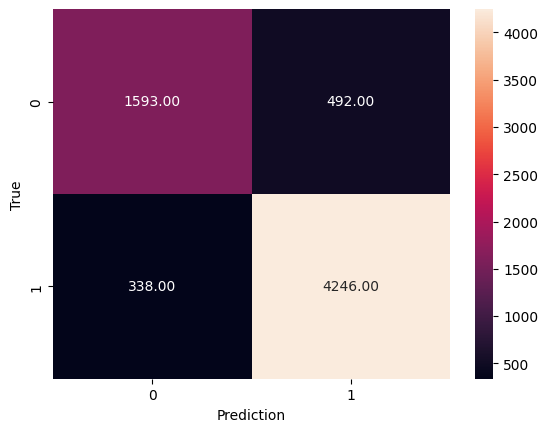

In [231]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt=".2f")

plt.xlabel("Prediction")
plt.ylabel("True")

plt.show()

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1894
           1       0.94      0.90      0.92      4775

    accuracy                           0.88      6669
   macro avg       0.85      0.87      0.86      6669
weighted avg       0.89      0.88      0.89      6669



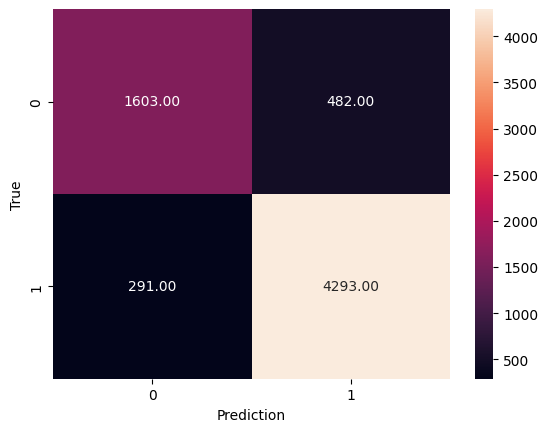

In [232]:
rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=8389, verbose=0, warm_start=False)
rf_model.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt=".2f")

plt.xlabel("Prediction")
plt.ylabel("True")

plt.show()